<h1 style="color:white; background-color:green;"><center style="font-size:50px">How long do you wanna live? </center><br><center style="font-size:20px">Author: Marco Lin</center></h1>

<h2><center style="font-size:30px"><u style="color: steelblue">Objective of the Proposed Research</u></center></h2>

Life expectancy is a very important indicator of development to a country. This time we are hired by WHO to give a comprehensive report to show the analysis of life expectancy. The report’s main idea is to give a recommendation to countries how to improve the life expectancy. 

Our dataset comes from The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis.The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. 

So, We will analyze the correlation between life expectancy and several variables to find which factor affects the most. We have variables below: Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, GDP, income, population, schooling and so on. At the first, we will do data cleaning to get rid of the data which has N/A value. Then explore four aspects of dataset: 1. Different Highest and lowest Life Expectancy in Developing and Developed Country, 2.Alcohol and Life Expectancy Correlation. 3.Disease and Life Expectancy Correlation. 4.Influence of GDP and Population to Life Expectancy


<h2><center style="font-size:32px"><u style="color: steelblue"> Data Cleaning</u></center></h2>

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
LifeData = pd.read_csv("Life Expectancy Data.csv")

In [3]:
nan_col1 = LifeData.isnull().any()
print (nan_col1)

Country                            False
Year                               False
Status                             False
LifeExpectancy                      True
AdultMortality                      True
infantDeaths                       False
Alcohol                             True
percentageExpenditure              False
HepatitisB                          True
Measles                            False
BMI                                 True
under-fiveDeaths                   False
Polio                               True
TotalExpenditure                    True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
It shows that in this dataset we have N/A values. 

In [4]:
LifeData2 = LifeData.fillna(LifeData.mean())
nan_col3 = LifeData2.isnull().any()  # 获得含有NA的列
print(nan_col3)

Country                            False
Year                               False
Status                             False
LifeExpectancy                     False
AdultMortality                     False
infantDeaths                       False
Alcohol                            False
percentageExpenditure              False
HepatitisB                         False
Measles                            False
BMI                                False
under-fiveDeaths                   False
Polio                              False
TotalExpenditure                   False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
I used mean values to instead the N/A values.

<h2><center style="font-size:32px"><u style="color: steelblue">Data Exploration</u></center></h2>

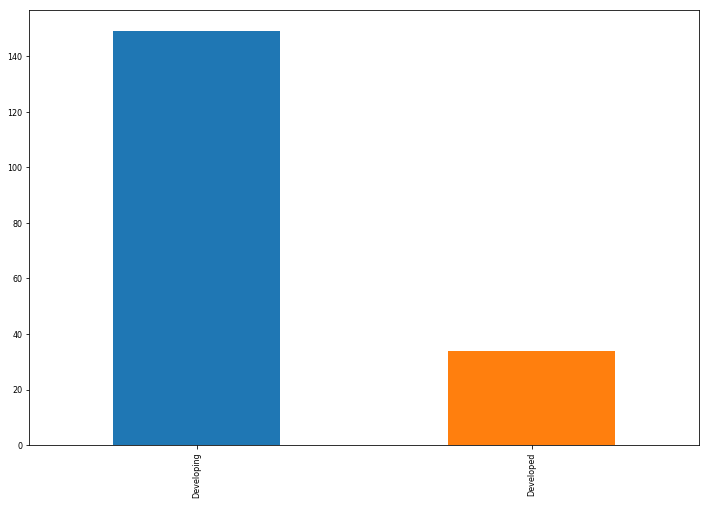

In [154]:
LifeData3['Status'].value_counts().plot.bar()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
Most of countries are developing countries. Only around 40 percent countries are developed.

In [5]:
LifeData.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
LifeData2.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'infantDeaths', 'Alcohol', 'percentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
type(LifeData2)

pandas.core.frame.DataFrame

In [8]:
LifeData2.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,infantDeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
LifeData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
LifeExpectancy                     2938 non-null float64
AdultMortality                     2938 non-null float64
infantDeaths                       2938 non-null int64
Alcohol                            2938 non-null float64
percentageExpenditure              2938 non-null float64
HepatitisB                         2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
under-fiveDeaths                   2938 non-null int64
Polio                              2938 non-null float64
TotalExpenditure                   2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null

<p style="font-size:20px;"><u style="color: darkred">A. Different Highest and lowest Life Expectancy in Developing and Developed Country</u></p>

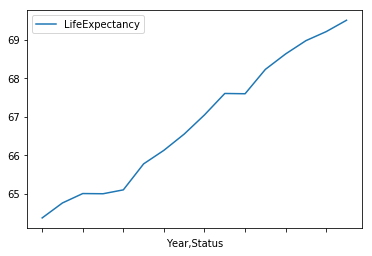

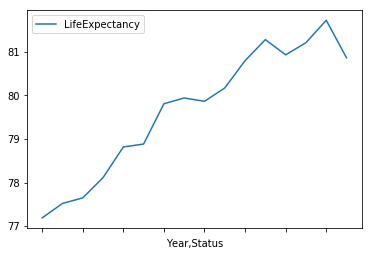

In [10]:
mask1 = LifeData2["Status"] == "Developing"
aver_Life2 = LifeData2[mask1]
aver_Life3 = aver_Life2.groupby(['Year','Status']).mean()

mask3 = LifeData2["Status"] == "Developed"
aver_Life4 = LifeData2[mask3]
aver_Life5 = aver_Life4.groupby(['Year','Status']).mean()

aver_Life3.plot(y = 'LifeExpectancy')
aver_Life5.plot(y = 'LifeExpectancy')

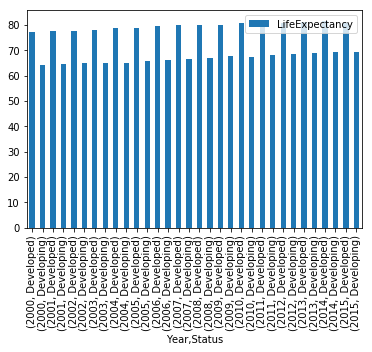

In [11]:
LifeData2[['LifeExpectancy','Year','Status']].groupby(['Year','Status']).mean().plot.bar()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
It shows that tendency of life expectancy in developed and developing countries are increasing. Especially, the average of life expectancy in developed countries which is 77 to 81 is higher than developing countries which is 65 to 69.

<p style="font-size:18px"><u>a.1 Highest Life Expectancy in Developing Country in 2015</u></p>

In [12]:
mask2 = LifeData2['Year'] == 2015

In [13]:
Develing = LifeData2[(mask1 & mask2)]
Develing[['Country', 'LifeExpectancy']].sort_values(by= 'LifeExpectancy', ascending = [False]).head()

,Country,LifeExpectancy
2345,Slovenia,88.0
673,Cyprus,85.0
544,Chile,85.0
625,Costa Rica,79.6
657,Cuba,79.1


![](http://ontheworldmap.com/slovenia/slovenia-location-map.jpg)

![](https://dataen.b-cdn.net/en/wp-content/uploads/2018/03/life-in-slovenia-800x445.jpg)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developing countries, the highest life expectancy country is Slovenia. The location is shown in the map. The picture is what it look like.

<p style="font-size:18px"><u>a.2 Lowest Life Expectancy in Developing Country</u></p>

In [14]:
Develing[['Country', 'LifeExpectancy']].sort_values(by= 'LifeExpectancy', ascending = [True]).head()

,Country,LifeExpectancy
2297,Sierra Leone,51.0
48,Angola,52.4
512,Central African Republic,52.5
528,Chad,53.1
432,Côte d'Ivoire,53.3


![](https://www.worldatlas.com/img/locator/country/sierra-leone-locator-map.jpg)

![](https://www.total.com/sites/default/files/thumbnails/image/sierra_leone_0.jpg)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developing countries, the lowest life expectancy country is Sierra Leone which is 51 year old. There is the map and the picture of Sierra Leone.

<p style="font-size:18px"><u>a.3 Highest Life Expectancy in Developed Country</u></p>

In [15]:
mask3 = LifeData2["Status"] == "Developed"
Develed = LifeData2[(mask3 & mask2)]
Develed[['Country', 'LifeExpectancy']].sort_values(by= 'LifeExpectancy', ascending = [False]).head()

,Country,LifeExpectancy
737,Denmark,86.0
1314,Japan,83.7
2521,Switzerland,83.4
2313,Singapore,83.1
112,Australia,82.8


![](http://ontheworldmap.com/denmark/denmark-location-map.jpg)

![](https://img.theculturetrip.com/x/smart/wp-content/uploads/2015/11/Denmark-©-Sean-Pavone-Shutterstock.jpg)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developed countries, the highest life expectancy country is Denmark which is 88 year old.

<p style="font-size:18px"><u>a.4 lowest Life Expectancy in Developed Country</u></p>

In [16]:
Develed[['Country', 'LifeExpectancy']].sort_values(by= 'LifeExpectancy', ascending = [True]).head()

,Country,LifeExpectancy
1522,Lithuania,73.6
1394,Kuwait,74.7
2135,Russian Federation,75.0
2810,Uruguay,77.0
2746,United Arab Emirates,77.1


![](https://www.worldatlas.com/img/locator/country/lithuania-locator-map.jpg)

![](https://cdn.theculturetrip.com/wp-content/uploads/2015/08/shutterstock_237525562-panorama-of-kaunas-from-aleksotas-hill-lithuania.jpg)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developed countries, the lowest life expectancy country is Lithuania which is 73 year old.

<p style="font-size:20px;"><u style="color: darkred">B. Different AdultMortality and infantDeaths Tendency  in Developing and Developed Country</u></p>

In [17]:
LifeData2.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'infantDeaths', 'Alcohol', 'percentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<p style="font-size:18px"><u>b.1 AdultMortality Tendency </u></p>

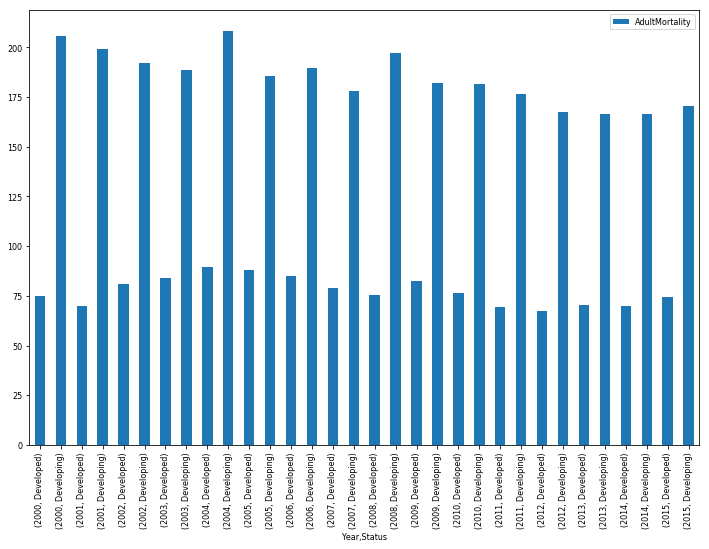

In [157]:
LifeData2[['AdultMortality','Year','Status']].groupby(['Year','Status']).mean().plot.bar()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developed countries, Adult Mortality is lower than developing countries

<p style="font-size:18px"><u>b.2 infantDeaths Tendency </u></p>

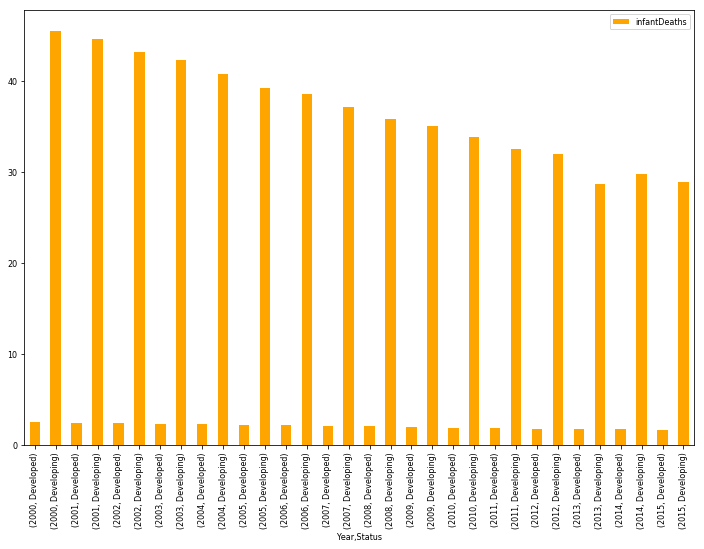

In [158]:
LifeData2[['infantDeaths','Year','Status']].groupby(['Year','Status']).mean().plot.bar(color='orange')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developed countries, infant deaths is lower than developing countries

<p style="font-size:20px;"><u style="color: darkred">C. GDP tendency in Developing and Developed Country</u></p>

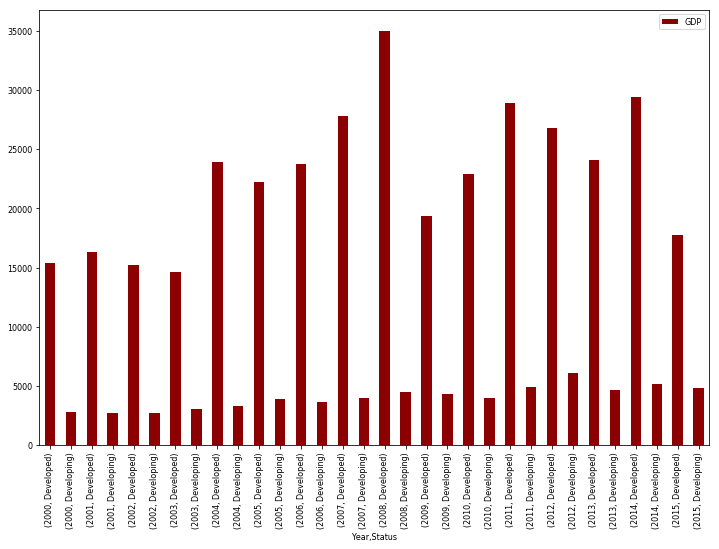

In [159]:
LifeData2[['GDP','Year','Status']].groupby(['Year','Status']).mean().plot.bar(color = 'darkred')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In developed countries, GDP is higher than developing countries.

<p style="font-size:20px;"><u style="color: darkred">D.Income composition of resources</u></p>

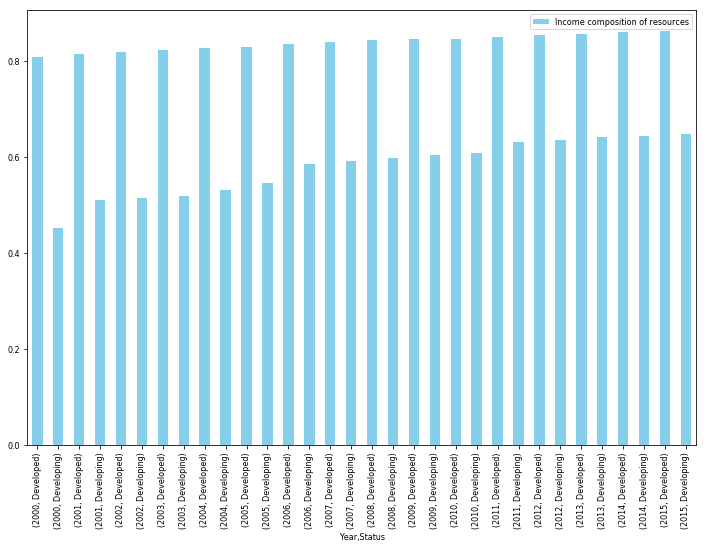

In [160]:
LifeData2[['Year','Status','Income composition of resources']].groupby(['Year','Status']).mean().plot.bar(color = 'skyblue')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
It shows that the income composition of resources in developed countries is higer than in developing countries. And, in developing countries, It seems that income composition of resources has increased from 2000.

<h2><center style="font-size:32px"><u style="color: steelblue">Adaptation</u></center></h2>

<p style="font-size:20px;"><u style="color: darkred">A. Add Death column  </u></p>

In [22]:
LifeData2[['AdultMortality','infantDeaths','under-fiveDeaths']].head()

,AdultMortality,infantDeaths,under-fiveDeaths
0,263.0,62,83
1,271.0,64,86
2,268.0,66,89
3,272.0,69,93
4,275.0,71,97


In [23]:
LifeData2['Death'] = LifeData2.apply(lambda x: x['AdultMortality'] + x['infantDeaths'] + x['under-fiveDeaths'],axis=1)

In [24]:
LifeData2[['AdultMortality','infantDeaths','under-fiveDeaths','Death']].head()

,AdultMortality,infantDeaths,under-fiveDeaths,Death
0,263.0,62,83,408.0
1,271.0,64,86,421.0
2,268.0,66,89,423.0
3,272.0,69,93,434.0
4,275.0,71,97,443.0


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
I used three columns: Adult-Mortality,infant-deaths,and under-five deaths to calculate the Deadth column. It can help us to analyze the correlation with life expectancy or other columns.

<p style="font-size:20px;"><u style="color: darkred">B. Add Disease column  </u></p>

In [25]:
LifeData2['Disease'] = LifeData2.apply(lambda x: x['HepatitisB'] +
                                       x['Measles'] + x['Polio']+ x['Diphtheria']+x['HIV/AIDS'],axis=1)

In [26]:
LifeData2[['Disease','Measles']].head()

,Disease,Measles
0,1290.1,1154
1,674.1,492
2,620.1,430
3,2988.1,2787
4,3217.1,3013


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
I sum Hepatitis B, Measles, Polio, Diphtheria, and HIV/AIDS to be one columns that can help me to analyze the total Disease number per capita.

In [27]:
LifeData3=LifeData2[(mask2)]

In [29]:
LifeData3.set_index('Country',inplace=True)

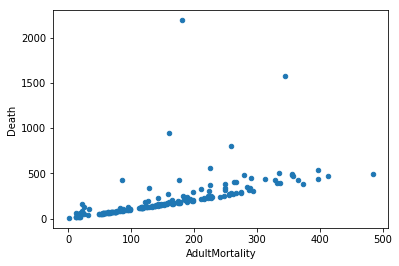

In [30]:
LifeData3[['AdultMortality','Death']].plot.scatter(x='AdultMortality',y='Death')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
It appears that the adult mortality affect death this new column the most.

<h2><center style="font-size:32px"><u style="color: steelblue">Correlation</u></center></h2>

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
In this part, I want to find the correlation between the LifeExpectancy and each factors, and I will choose two for our prediction.

<p style="font-size:20px;"><u style="color: darkred">A. Alcohol and Life Expectancy Correlation </u></p>

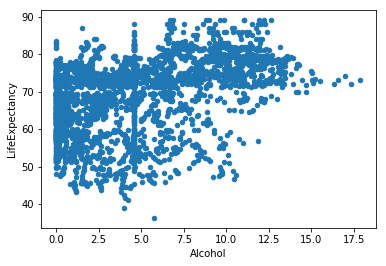

In [31]:
LifeData2.plot.scatter(x='Alcohol' , y='LifeExpectancy')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
The plot shows that no correlation between Alcohol and Life Expectancy in general. Let's take a look about the life expectancy in lowest alcohol and highest alcohol countries

In [32]:
Alcohol_data = LifeData2[(LifeData['Year'] == 2014)]
Alcohol_data
Alcohol_data.set_index('Country', inplace=True)
Alcohol_data[['Status', 'LifeExpectancy', 'Alcohol']].sort_values(by='Alcohol', ascending = [False]).head()

,Status,LifeExpectancy,Alcohol
Country,,,
Lithuania,Developed,73.4,15.19
Belarus,Developing,72.0,13.94
Czechia,Developing,78.6,12.68
Belgium,Developed,89.0,12.60
Austria,Developed,81.4,12.32


In [33]:
Alcohol_data[['Status', 'LifeExpectancy', 'Alcohol']].sort_values(by='Alcohol', ascending = [True]).head()

,Status,LifeExpectancy,Alcohol
Country,,,
Afghanistan,Developing,59.9,0.01
Guinea-Bissau,Developing,58.4,0.01
Guinea,Developing,58.1,0.01
Namibia,Developing,65.9,0.01
Nepal,Developing,69.6,0.01


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
The tables above appears that in Belgium, people drink alcohol rate is 12.6 but the life expectancy is up tp 89 years old. And, in Montenegro, evethought alcohol rate is 0.01 per capita, the life expectancy is also up to 75.6. So, we know alcohol may not contribute to life expectancy.

<p style="font-size:20px;"><u style="color: darkred">B. Disease and Life Expectancy Correlation</u></p>

In [82]:
DiseaseData = LifeData2[['Country', 'LifeExpectancy', 'HepatitisB', 'Diphtheria','BMI','Polio','HIV/AIDS','Disease']]
DiseaseData.corr()

,LifeExpectancy,HepatitisB,Diphtheria,BMI,Polio,HIV/AIDS,Disease
LifeExpectancy,1.000000,0.203771,0.475418,0.559255,0.461574,-0.556457,-0.155611
HepatitisB,0.203771,1.000000,0.499958,0.134929,0.408519,-0.102405,-0.086593
Diphtheria,0.475418,0.499958,1.000000,0.281059,0.673553,-0.164787,-0.137616
BMI,0.559255,0.134929,0.281059,1.000000,0.282156,-0.243548,-0.174740
Polio,0.461574,0.408519,0.673553,0.282156,1.000000,-0.159489,-0.132083
HIV/AIDS,-0.556457,-0.102405,-0.164787,-0.243548,-0.159489,1.000000,0.030497
Disease,-0.155611,-0.086593,-0.137616,-0.174740,-0.132083,0.030497,1.000000


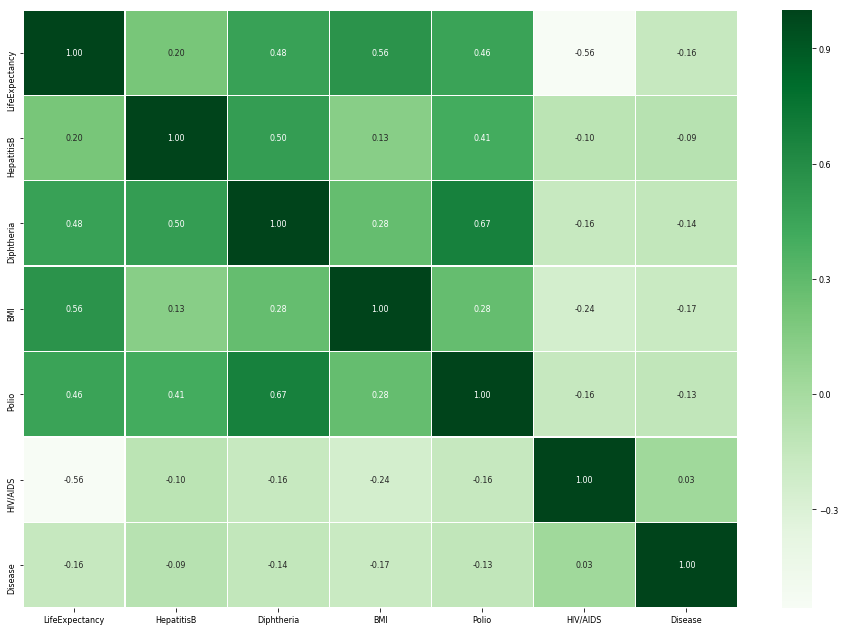

In [83]:
import seaborn as sns
plt.figure(figsize=(16,11))
sns.heatmap(DiseaseData.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");

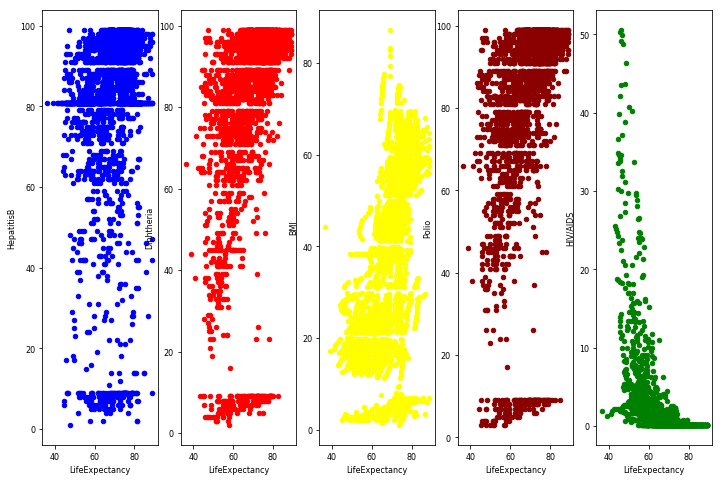

In [36]:
plt.rcParams['font.size']=8
plt.rcParams['figure.figsize']=[12, 8]
fig, axes=plt.subplots(nrows=1, ncols=5)
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='HepatitisB', ax=axes[0], color='Blue');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='Diphtheria', ax=axes[1], color='Red');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='BMI', ax=axes[2], color='Yellow');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='Polio', ax=axes[3], color='darkred');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='HIV/AIDS', ax=axes[4], color='green');

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
We have five plots show different distribution of diease and one heatmap to show correlation between life expectancy and disease. We found only BMI (up to 0.57) and HIV/AIDS (up to 0.56)have higher correation with life expectancy. 

<p style="font-size:20px;"><u style="color: darkred">C. Influence of GDP and Population to Life Expectancy  </u></p>

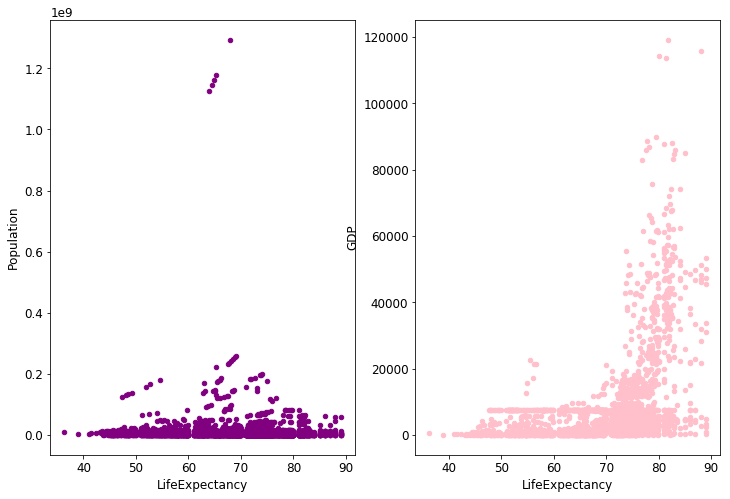

In [37]:
import matplotlib.pyplot as plt
 
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=[12, 8]
fig, axes=plt.subplots(nrows=1, ncols=2)
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='Population', ax=axes[0], color='Purple');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='GDP', ax=axes[1], color='Pink');


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
It represent that GDP seems like have linear regression with life expectancy. Higher GDP countries has higher life expectancy. It seems that BMI and GDP are more relatived our life expectancy. So, I will choose this two for our clusering and prediction.

<h2><center style="font-size:32px "><u style="color: steelblue">Step-by-step hierarchical clustering</u></center></h2>

<p style="font-size:20px;"><u style="color: darkred">A. DATA Choosing  </u></p>

In [38]:
Cluster_data = LifeData2[(mask2)]

In [39]:
Cluster_dataA=Cluster_data[['Country','LifeExpectancy','BMI','GDP']]

In [40]:
Cluster_dataA.set_index('Country', inplace = True)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
First of all, this cluster will focus on the data in 2015, and factors will be life expectancy, BMI, and GDP. The column 'Country' is index.

<p style="font-size:20px;"><u style="color: darkred">B. Normalization  </u></p>

In [41]:
norm_Cluster_dataA = round((Cluster_dataA - Cluster_dataA.min())/(Cluster_dataA.max() - Cluster_dataA.min()),2)

In [42]:
norm_Cluster_dataA.head()

,LifeExpectancy,BMI,GDP
Country,,,
Afghanistan,0.38,0.22,0.01
Albania,0.72,0.74,0.06
Algeria,0.66,0.76,0.06
Angola,0.04,0.28,0.06
Antigua and Barbuda,0.69,0.60,0.20


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
By normalizing the data, we can limit our valunes between 1 to 0.

<p style="font-size:20px;"><u style="color: darkred">C. Distance </u></p>

In [43]:
from sklearn.metrics.pairwise import euclidean_distances
norm_Cluster_dataD = DataFrame(euclidean_distances(norm_Cluster_dataA))
norm_Cluster_dataD.astype(float).head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,0.000000,0.623298,0.610328,0.348855,0.525928,0.680074,0.545894,1.154513,0.936056,0.496689,...,0.147309,0.776724,0.714703,0.361109,0.497795,0.626498,0.316860,0.316860,0.108628,0.177482
1,0.623298,0.000000,0.063246,0.820975,0.200250,0.157480,0.102470,0.809815,0.608358,0.159374,...,0.631664,0.163095,0.188944,0.285832,0.172337,0.122474,0.543783,0.391535,0.630952,0.458476
2,0.610328,0.063246,0.000000,0.784092,0.214709,0.146969,0.080623,0.819878,0.621691,0.128841,...,0.608112,0.171464,0.184662,0.257876,0.134536,0.070711,0.562583,0.357351,0.607371,0.439773
3,0.348855,0.820975,0.784092,0.000000,0.737902,0.836421,0.734098,1.273342,1.082081,0.676905,...,0.254951,0.944987,0.869540,0.539351,0.666708,0.773951,0.646916,0.435546,0.253180,0.409634
4,0.525928,0.200250,0.214709,0.737902,0.000000,0.200250,0.220454,0.716868,0.495379,0.234307,...,0.520096,0.311609,0.222261,0.258070,0.246577,0.221585,0.410122,0.314006,0.542955,0.389487


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
We calculated the distance of each variables. The table we have is for next step to find the clustering. We will find several clustering by analyze the closest variables.

<p style="font-size:20px;"><u style="color: darkred">D. Step-by-step hierarchical clustering </u></p>

In [44]:
import random

clusterOne = 0
clusterTwo = 0

while clusterTwo == clusterOne:
    clusterOne = random.randint(0,182)
    clusterTwo = random.randint(0,182)

groupOne = []
groupTwo = []


for j in range(0,183):
    if clusterOne == j:
        pass
    else:
        if norm_Cluster_dataD.iloc[clusterOne][j] > norm_Cluster_dataD.iloc[clusterTwo][j]:
            groupTwo.append(clusterTwo*1000+j)
        else:
            groupOne.append(clusterOne*1000+j)

In [45]:
groupTwo

[16000,
 16003,
 16012,
 16016,
 16017,
 16025,
 16026,
 16027,
 16029,
 16030,
 16032,
 16033,
 16037,
 16038,
 16039,
 16042,
 16045,
 16052,
 16053,
 16055,
 16060,
 16066,
 16067,
 16068,
 16074,
 16085,
 16089,
 16092,
 16093,
 16097,
 16098,
 16099,
 16101,
 16103,
 16110,
 16111,
 16113,
 16117,
 16118,
 16124,
 16132,
 16133,
 16134,
 16138,
 16140,
 16141,
 16143,
 16146,
 16147,
 16148,
 16159,
 16161,
 16162,
 16163,
 16169,
 16173,
 16179,
 16181]

In [46]:
groupOne

[35001,
 35002,
 35004,
 35005,
 35006,
 35007,
 35008,
 35009,
 35010,
 35011,
 35013,
 35014,
 35015,
 35018,
 35019,
 35020,
 35021,
 35022,
 35023,
 35024,
 35028,
 35031,
 35034,
 35036,
 35040,
 35041,
 35043,
 35044,
 35046,
 35047,
 35048,
 35049,
 35050,
 35051,
 35054,
 35056,
 35057,
 35058,
 35059,
 35061,
 35062,
 35063,
 35064,
 35065,
 35069,
 35070,
 35071,
 35072,
 35073,
 35075,
 35076,
 35077,
 35078,
 35079,
 35080,
 35081,
 35082,
 35083,
 35084,
 35086,
 35087,
 35088,
 35090,
 35091,
 35094,
 35095,
 35096,
 35100,
 35102,
 35104,
 35105,
 35106,
 35107,
 35108,
 35109,
 35112,
 35114,
 35115,
 35116,
 35119,
 35120,
 35121,
 35122,
 35123,
 35125,
 35126,
 35127,
 35128,
 35129,
 35130,
 35131,
 35135,
 35136,
 35137,
 35139,
 35142,
 35144,
 35145,
 35149,
 35150,
 35151,
 35152,
 35153,
 35154,
 35155,
 35156,
 35157,
 35158,
 35160,
 35164,
 35165,
 35166,
 35167,
 35168,
 35170,
 35171,
 35172,
 35174,
 35175,
 35176,
 35177,
 35178,
 35180,
 35182]

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
We used our algorithm to claasify 183 countries into two clustering. The numbers we got for example, 142153 means 153 this countries is belong to 142 this countries.

<h2><center style="font-size:32px "><u style="color: steelblue">Dendrogram</u></center></h2>

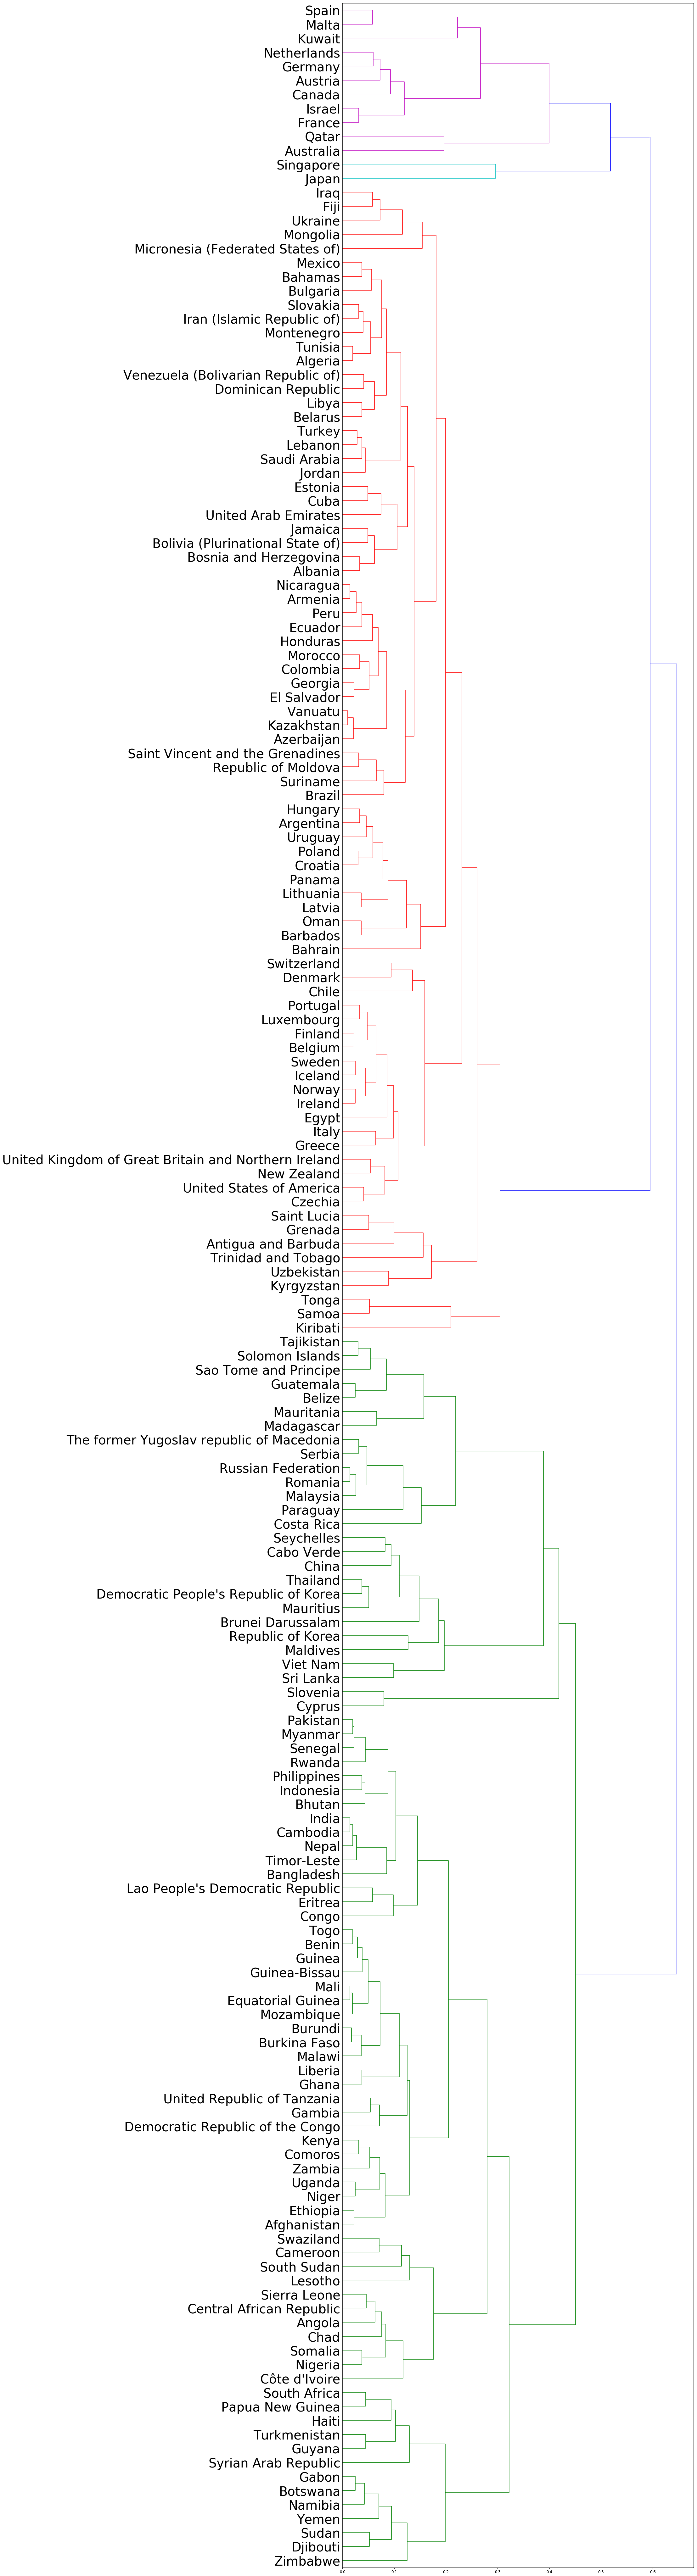

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
Z = linkage(norm_Cluster_dataA, 'average')
plt.figure(figsize=(20, 150))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=40, 
               labels = norm_Cluster_dataA.index)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
We made several clusters in dendrogram. we have five group in here. In each group, countries has similar GDP and BMI.

<p style="font-size:20px;"><u style="color: darkred">3D plot </u></p>

In [48]:
norm_Cluster_dataA.columns

Index(['LifeExpectancy', 'BMI', 'GDP'], dtype='object')

Text(0.5, 0, 'BMI')

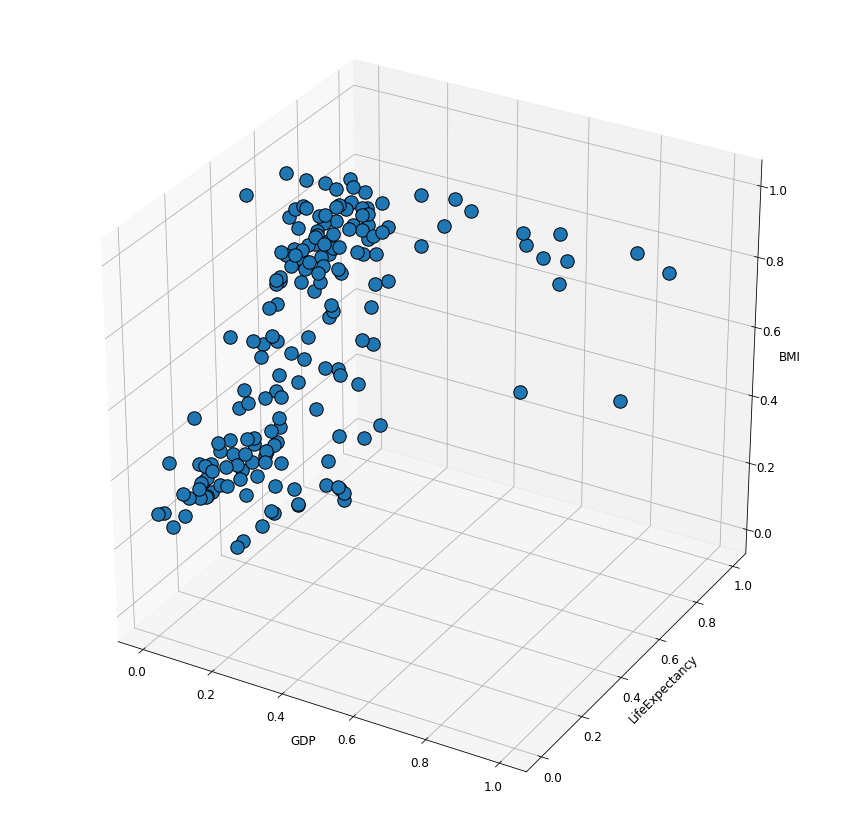

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = norm_Cluster_dataA.GDP, ys = norm_Cluster_dataA.LifeExpectancy , zs = norm_Cluster_dataA.BMI, s= 180, edgecolor = 'black', depthshade = False)

ax.set_xlabel('GDP')
ax.set_ylabel('LifeExpectancy')
ax.set_zlabel('BMI')


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
I visulize our data in 3D plot. It shows the distribution of GDP, BMI, and LifeExpectancy.

<h2><center style="font-size:30px"><u style="color: steelblue">Step by Step Kmean</u></center></h2>

<h2><center style="font-size:19px"><u style="color: darkblue">First Iteration</u></center></h2>

In [50]:
norm_Cluster_dataA.columns

Index(['LifeExpectancy', 'BMI', 'GDP'], dtype='object')

Text(0, 0.5, 'GDP')

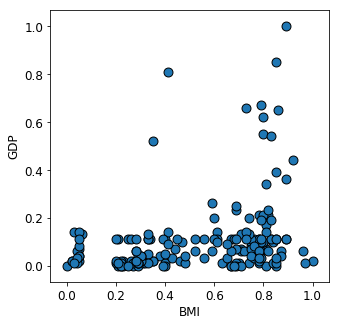

In [51]:
fig = plt.figure(figsize=(5,5))
plt.scatter(norm_Cluster_dataA.BMI,norm_Cluster_dataA.GDP, edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')

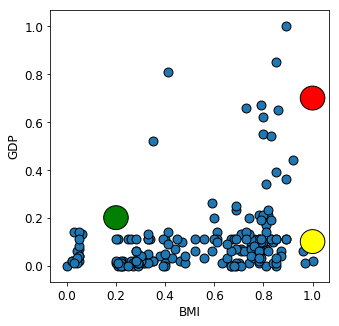

In [52]:
centroid1 = np.array([1,0.1])
centroid2 = np.array([1, 0.7])
centroid3 = np.array([0.2, 0.2])

fig = plt.figure(figsize=(5,5))
plt.scatter(norm_Cluster_dataA.BMI,norm_Cluster_dataA.GDP, edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')
circle1 = plt.Circle(centroid1, radius=0.05, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.05, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.05, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We used BMI and GDP columns to implement our K-means

Text(0, 0.5, 'GDP')

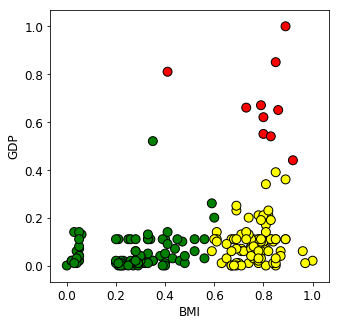

In [53]:
norm_Cluster_dataA["Dist_C1"] = np.sqrt((norm_Cluster_dataA.BMI - centroid1[0])**2 
                             + (norm_Cluster_dataA.GDP - centroid1[1])**2)
norm_Cluster_dataA["Dist_C2"] = np.sqrt((norm_Cluster_dataA.BMI - centroid2[0])**2 + 
                             (norm_Cluster_dataA.GDP - centroid2[1])**2)
norm_Cluster_dataA["Dist_C3"] = np.sqrt((norm_Cluster_dataA.BMI - centroid3[0])**2 + 
                             (norm_Cluster_dataA.GDP - centroid3[1])**2)

norm_Cluster_dataA["Association"] = np.where(
    (norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C2) & 
    (norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C3), 1, 
     np.where((norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C1) & 
    (norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(norm_Cluster_dataA.BMI, norm_Cluster_dataA.GDP, 
            c=colormap[norm_Cluster_dataA.Association], edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
After calculation of distance, we got three groups with different color.

<h2><center style="font-size:19px"><u style="color: darkblue">Second Iteration</u></center></h2>

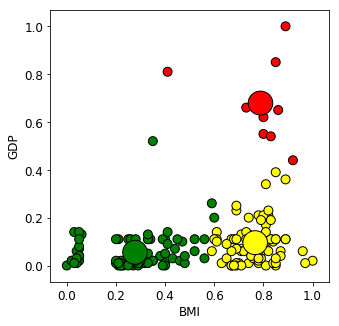

In [54]:
centroid1 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 1][["BMI", "GDP"]].mean()
centroid2 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 2][["BMI", "GDP"]].mean()
centroid3 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 3][["BMI", "GDP"]].mean()

fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
plt.scatter(norm_Cluster_dataA.BMI,norm_Cluster_dataA.GDP, c=colormap[norm_Cluster_dataA.Association], edgecolor = 'black', s = 80)

#plt.scatter(norm_Cluster_dataA.fav_food,norm_Cluster_dataA.GDP, edgecolor = 'black', s = 80)

plt.xlabel('BMI')
plt.ylabel('GDP')
circle1 = plt.Circle(centroid1, radius=0.05, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.05, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.05, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)



<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
After calculation of distance again, we moved the central point to the mean again. The central points are stil moving

<h2><center style="font-size:19px"><u style="color: darkblue">3 Iteration</u></center></h2>

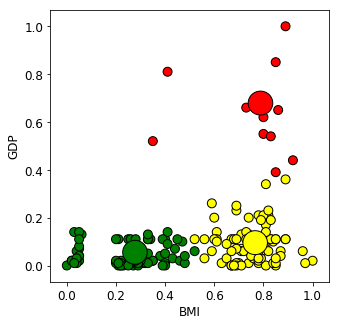

In [55]:
norm_Cluster_dataA["Dist_C1"] = np.sqrt((norm_Cluster_dataA.BMI - centroid1[0])**2 + (norm_Cluster_dataA.GDP - centroid1[1])**2)
norm_Cluster_dataA["Dist_C2"] = np.sqrt((norm_Cluster_dataA.BMI - centroid2[0])**2 + (norm_Cluster_dataA.GDP - centroid2[1])**2)
norm_Cluster_dataA["Dist_C3"] = np.sqrt((norm_Cluster_dataA.BMI - centroid3[0])**2 + (norm_Cluster_dataA.GDP - centroid3[1])**2)
norm_Cluster_dataA["Association"] = np.where((norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C2) & 
                                  (norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C3), 1, 
                                   np.where((norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C1) & 
                                  (norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
# Plot Sepal
plt.scatter(norm_Cluster_dataA.BMI,norm_Cluster_dataA.GDP, c=colormap[norm_Cluster_dataA.Association], edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')
circle1 = plt.Circle(centroid1, radius=0.05, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.05, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.05, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
After calculation of distance again, we moved the central point to the mean again

<h2><center style="font-size:19px"><u style="color: darkblue">4 Iteration</u></center></h2>

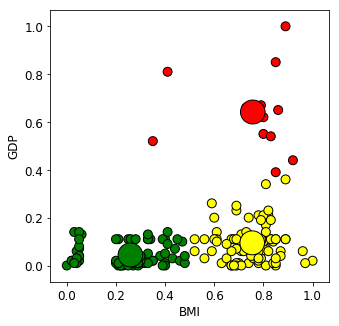

In [56]:
centroid1 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 1][["BMI", "GDP"]].mean()
centroid2 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 2][["BMI", "GDP"]].mean()
centroid3 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 3][["BMI", "GDP"]].mean()
norm_Cluster_dataA["Dist_C1"] = np.sqrt((norm_Cluster_dataA.BMI - centroid1[0])**2 + (norm_Cluster_dataA.GDP - centroid1[1])**2)
norm_Cluster_dataA["Dist_C2"] = np.sqrt((norm_Cluster_dataA.BMI - centroid2[0])**2 + (norm_Cluster_dataA.GDP - centroid2[1])**2)
norm_Cluster_dataA["Dist_C3"] = np.sqrt((norm_Cluster_dataA.BMI - centroid3[0])**2 + (norm_Cluster_dataA.GDP - centroid3[1])**2)
norm_Cluster_dataA["Association"] = np.where((norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C2) & 
                                  (norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C3), 1, 
                                   np.where((norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C1) & 
                                  (norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(norm_Cluster_dataA.BMI, norm_Cluster_dataA.GDP, c=colormap[norm_Cluster_dataA.Association], edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')
circle1 = plt.Circle(centroid1, radius=0.05, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.05, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.05, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
Then, we need to check our mean value again.

<h2><center style="font-size:19px"><u style="color: darkblue">Done</u></center></h2>

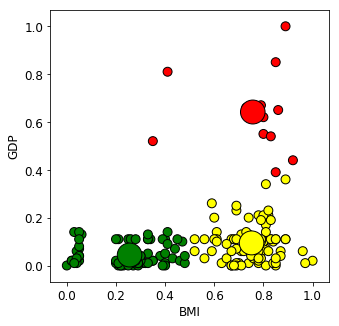

In [57]:
centroid1 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 1][["BMI", "GDP"]].mean()
centroid2 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 2][["BMI", "GDP"]].mean()
centroid3 = norm_Cluster_dataA[norm_Cluster_dataA.Association == 3][["BMI", "GDP"]].mean()
norm_Cluster_dataA["Dist_C1"] = np.sqrt((norm_Cluster_dataA.BMI - centroid1[0])**2 + (norm_Cluster_dataA.GDP - centroid1[1])**2)
norm_Cluster_dataA["Dist_C2"] = np.sqrt((norm_Cluster_dataA.BMI - centroid2[0])**2 + (norm_Cluster_dataA.GDP - centroid2[1])**2)
norm_Cluster_dataA["Dist_C3"] = np.sqrt((norm_Cluster_dataA.BMI - centroid3[0])**2 + (norm_Cluster_dataA.GDP - centroid3[1])**2)
norm_Cluster_dataA["Association"] = np.where((norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C2) & 
                                  (norm_Cluster_dataA.Dist_C1 < norm_Cluster_dataA.Dist_C3), 1, 
                                   np.where((norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C1) & 
                                  (norm_Cluster_dataA.Dist_C2 < norm_Cluster_dataA.Dist_C3) , 2, 3))
fig = plt.figure(figsize=(5,5))
 
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])
 
# Plot Sepal
plt.scatter(norm_Cluster_dataA.BMI, norm_Cluster_dataA.GDP, c=colormap[norm_Cluster_dataA.Association], edgecolor = 'black', s = 80)
plt.xlabel('BMI')
plt.ylabel('GDP')
circle1 = plt.Circle(centroid1, radius=0.05, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=0.05, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=0.05, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
Finally, the plot is not changing anymore, we have three groups of countries. For this plot,  we can classify our countries into different life expectancy. 

<h2><center style="font-size:32px "><u style="color: steelblue">sklearn.cluster</u></center></h2>

In [58]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(norm_Cluster_dataA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'GDP')

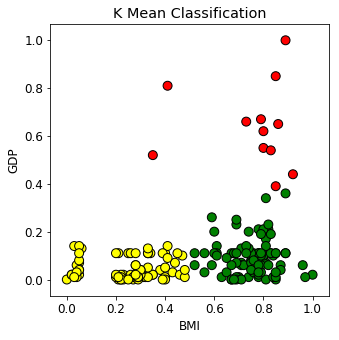

In [59]:
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'green', 'red'])
 
plt.scatter(norm_Cluster_dataA.BMI, norm_Cluster_dataA.GDP, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('BMI')
plt.ylabel('GDP')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
By using sklearn.cluster, we can get the same result of step by step K-mean function easily.

<h2><center style="font-size:30px"><u style="color: steelblue">KNN Function</u></center></h2>

In [60]:
KNN_Data_N = norm_Cluster_dataA[['BMI','GDP','LifeExpectancy']]

In [61]:
KNN_Data_N['group']= np.sqrt(KNN_Data_N.BMI**2+KNN_Data_N.GDP**2)

/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
KNN_Data_N['group'] = round(KNN_Data_N['group']*10,0)

/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
KNN_Data_N['group']=KNN_Data_N['group'].astype(int)

/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
KNN_Data_N['group'] = round(KNN_Data_N['group']/2.6,0)

/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
KNN_Data_N['group'].value_counts()

3.0    77
1.0    44
2.0    33
0.0    16
4.0    11
5.0     2
Name: group, dtype: int64

In [66]:
KNN_Data_N['group']=KNN_Data_N['group'].astype(int)

/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
<br>
I use GDP and Life Expectancy to do data visualization.

<p style="font-size:24px;"><u style="color: darkred">Data Visualization </u></p>

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'GDP')

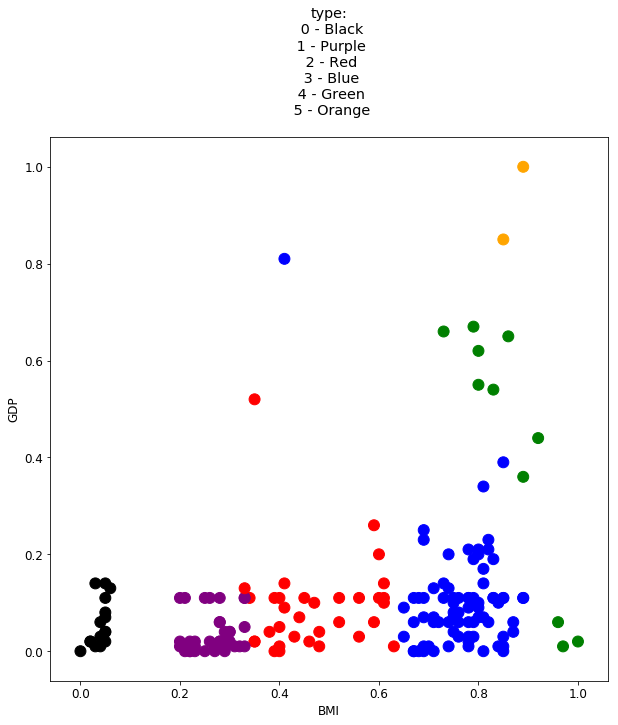

In [67]:
fig = plt.figure(figsize=(10,10))
colormap = np.array(['black', 'purple', 'red', 'blue', 'green','orange'])
 
plt.scatter(KNN_Data_N.BMI, KNN_Data_N.GDP, 
            c = colormap[KNN_Data_N.group], s = 120)
plt.title('type:\n 0 - Black\n 1 - Purple\n 2 - Red\n 3 - Blue\n 4 - Green\n 5 - Orange\n' )
ax = fig.add_subplot(111)
ax.set_xlabel('BMI')
ax.set_ylabel('GDP')

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction of KNN function</u></p>

In [68]:
def predictKNN():
    
    Kvalue = int(input('k : '))
    BMIValue = float(input('BMI : '))
    GDPValue = float(input('GDP: '))
    groupValue = 0
    point = np.array([BMIValue, GDPValue, groupValue])
        #2.distance
    KNN_Data_N["Dist"] = np.sqrt((KNN_Data_N.BMI - point[0])**2 + (KNN_Data_N.GDP - point[1])**2)
        #3.sort
    KNN_Data2 = KNN_Data_N.sort_values(by= "Dist", ascending=[False]).head(Kvalue)
        #4.checking neborhood 
    typedata = KNN_Data2['group'].value_counts()
    print(typedata[:1])

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction 1</u></p>

In [88]:
predictKNN()

k : 3
BMI : 0.4
GDP: 0.2
5    2
Name: group, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this countries belongs group 5 and there are 2 neighbors which are also group 5.

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction 2</u></p>

In [89]:
predictKNN()

k : 3
BMI : 0.5
GDP: 0.5
4    2
Name: group, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this countries belongs group 4 and there are 2 neighbors which are also group 4.

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction 3</u></p>

In [90]:
predictKNN()

k : 7
BMI : 0.99
GDP: 0.88
0    7
Name: group, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this countries belongs group 0 and there are 7 neighbors which are also group 0.

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction 4</u></p>

In [91]:
predictKNN()

k : 5
BMI : 0.14
GDP: 0.8
4    3
Name: group, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this countries belongs group 4 and there are 3 neighbors which are also group 4.

<p style="font-size:20px;"><u style="color: darkolivegreen">Prediction 5</u></p>

In [92]:
predictKNN()

k : 1
BMI : 0.9
GDP: 1
0    1
Name: group, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this countries belongs group 0 and there are 1 neighbors which are also group 0.

<h2><center style="font-size:30px"><u style="color: steelblue">Project Report</u></center></h2>

Life expectancy in each countries shows that the tendency of life expectancy has increased from 2005. In addition, the life expectancy in developed countries are higher than in developing countries which is reasonable. The following is the plot.

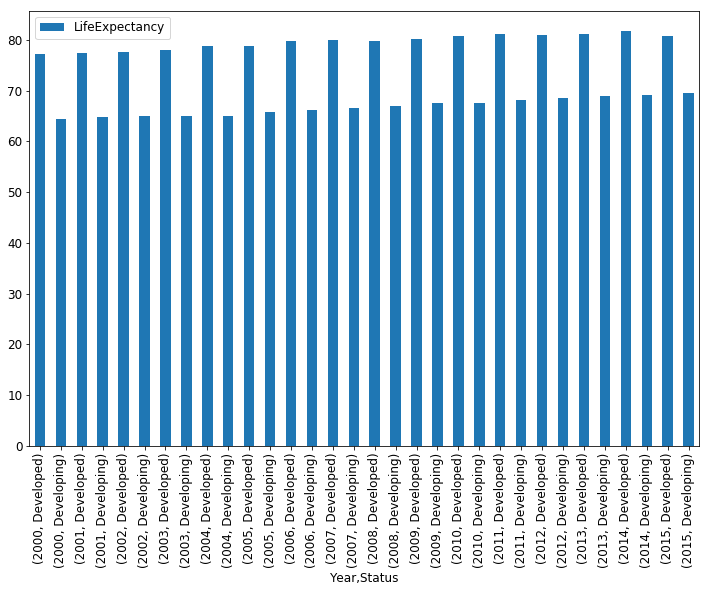

In [74]:
LifeData2[['LifeExpectancy','Year','Status']].groupby(['Year','Status']).mean().plot.bar()

In 2015, the highest and lowest life expectancy in developed countries was Denmark and Lithuania whose life expectancy are up to 86 and 73. On the other side, the highest and lowest life expectancy in developing countries are Slovenia and Sierra Leone which has 88 and 51. <br>
I also explored the adult mortality, Income composition, GDP changing in two type of country. Adult mortality and infant Deaths in developing countries are higher in developed countries. But, for GDP, developed countries are higher than developing countries which is also predictable. <br>


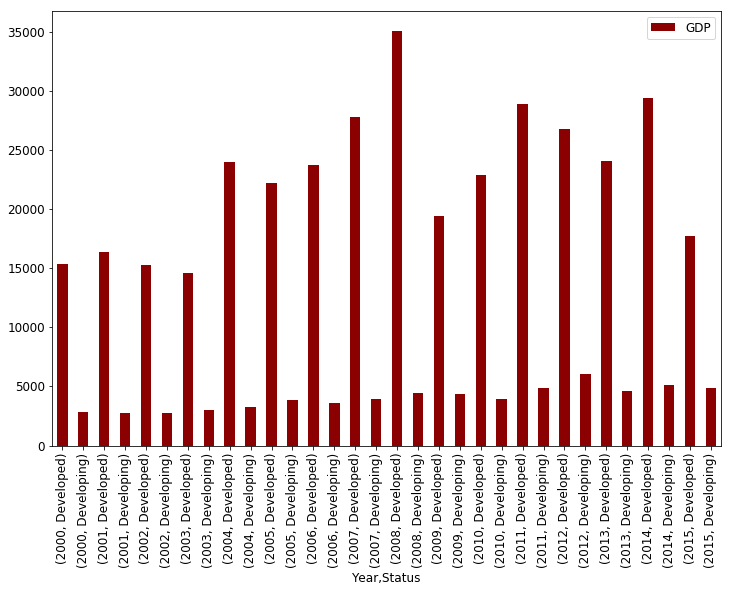

In [75]:
LifeData2[['GDP','Year','Status']].groupby(['Year','Status']).mean().plot.bar(color = 'darkred')

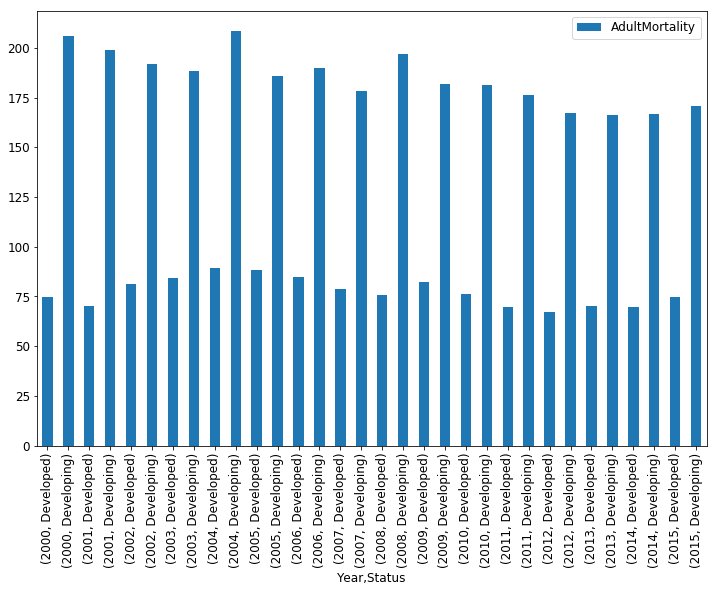

In [76]:
LifeData2[['AdultMortality','Year','Status']].groupby(['Year','Status']).mean().plot.bar()

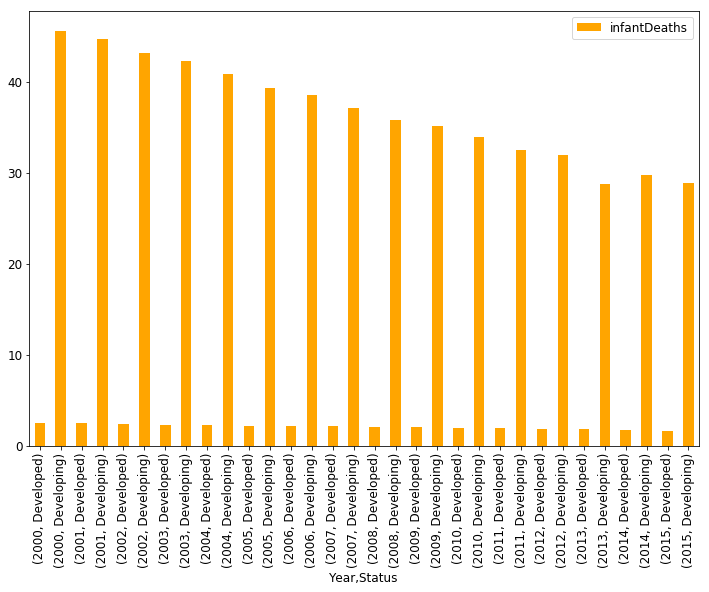

In [77]:
LifeData2[['infantDeaths','Year','Status']].groupby(['Year','Status']).mean().plot.bar(color='orange')

For our prediction, I sum the columns which are adult mortality, infant Deaths and under-five Deaths to be a new column called Death. Another new column is Disease column which is sum by sever disease like HepatitisB, Measles, polio, Diphtheria, and HIV/AIDS columns. I explored the correlation in each factors with life expectancy. Two plots present that Death afftect the life expectancy more and disease is not strongly relatived with life expectancy.

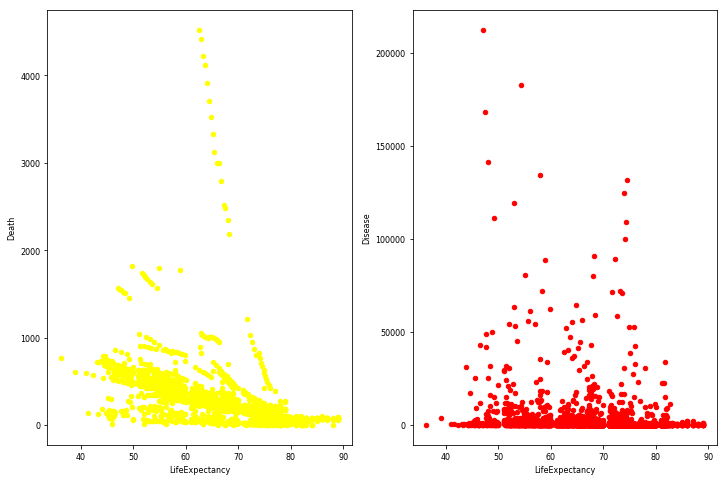

In [78]:
plt.rcParams['font.size']=8
plt.rcParams['figure.figsize']=[12, 8]
fig, axes=plt.subplots(nrows=1, ncols=2)
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='Death', ax=axes[0], color='Yellow');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='Disease', ax=axes[1], color='Red');

By the heatmap and scatter plot, I found two factories may affect the life expectancy the most. BMI and GDP. So, for prediction, I decided used GDP and BMI.

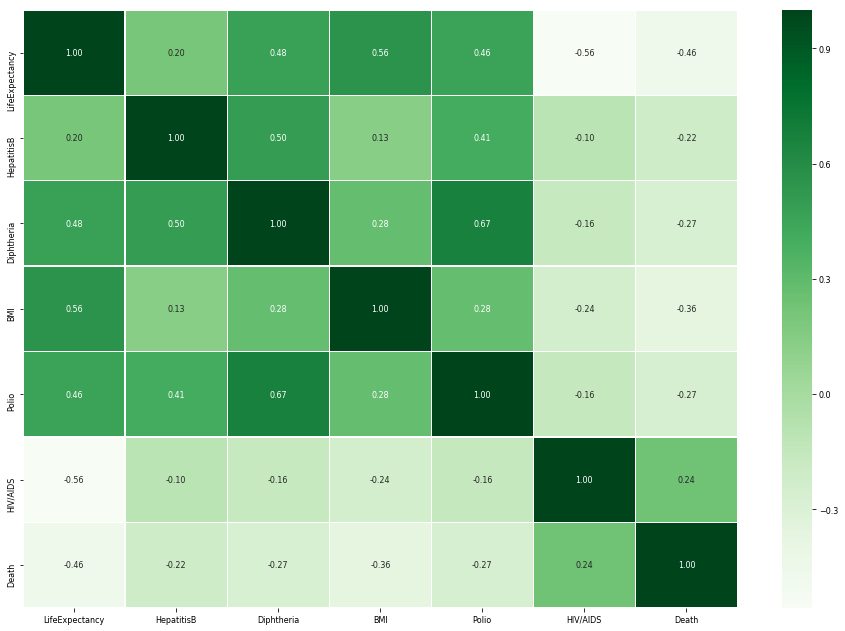

In [80]:
import seaborn as sns
plt.figure(figsize=(16,11))
sns.heatmap(DiseaseData.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");

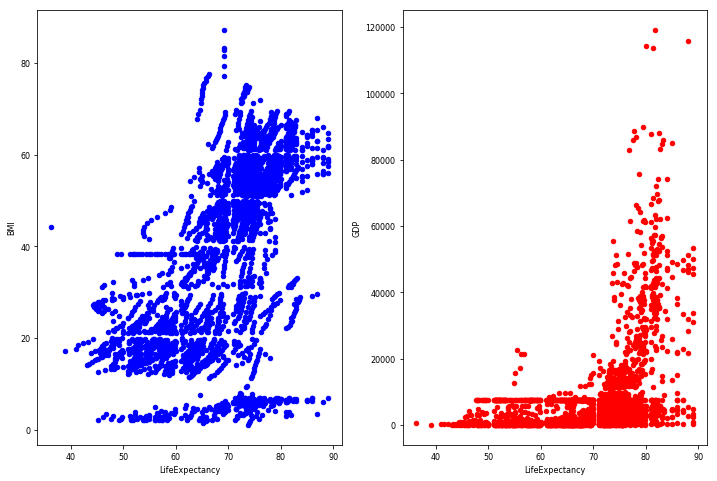

In [84]:
plt.rcParams['font.size']=8
plt.rcParams['figure.figsize']=[12, 8]
fig, axes=plt.subplots(nrows=1, ncols=2)
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='BMI', ax=axes[0], color='Blue');
LifeData2.plot(kind='scatter', x='LifeExpectancy', y='GDP', ax=axes[1], color='Red');

we used clustering algorithm to cluster countries. I got five clusters. This dendrogram presents that the countries which has similar GDP and BMI are in the same group. 

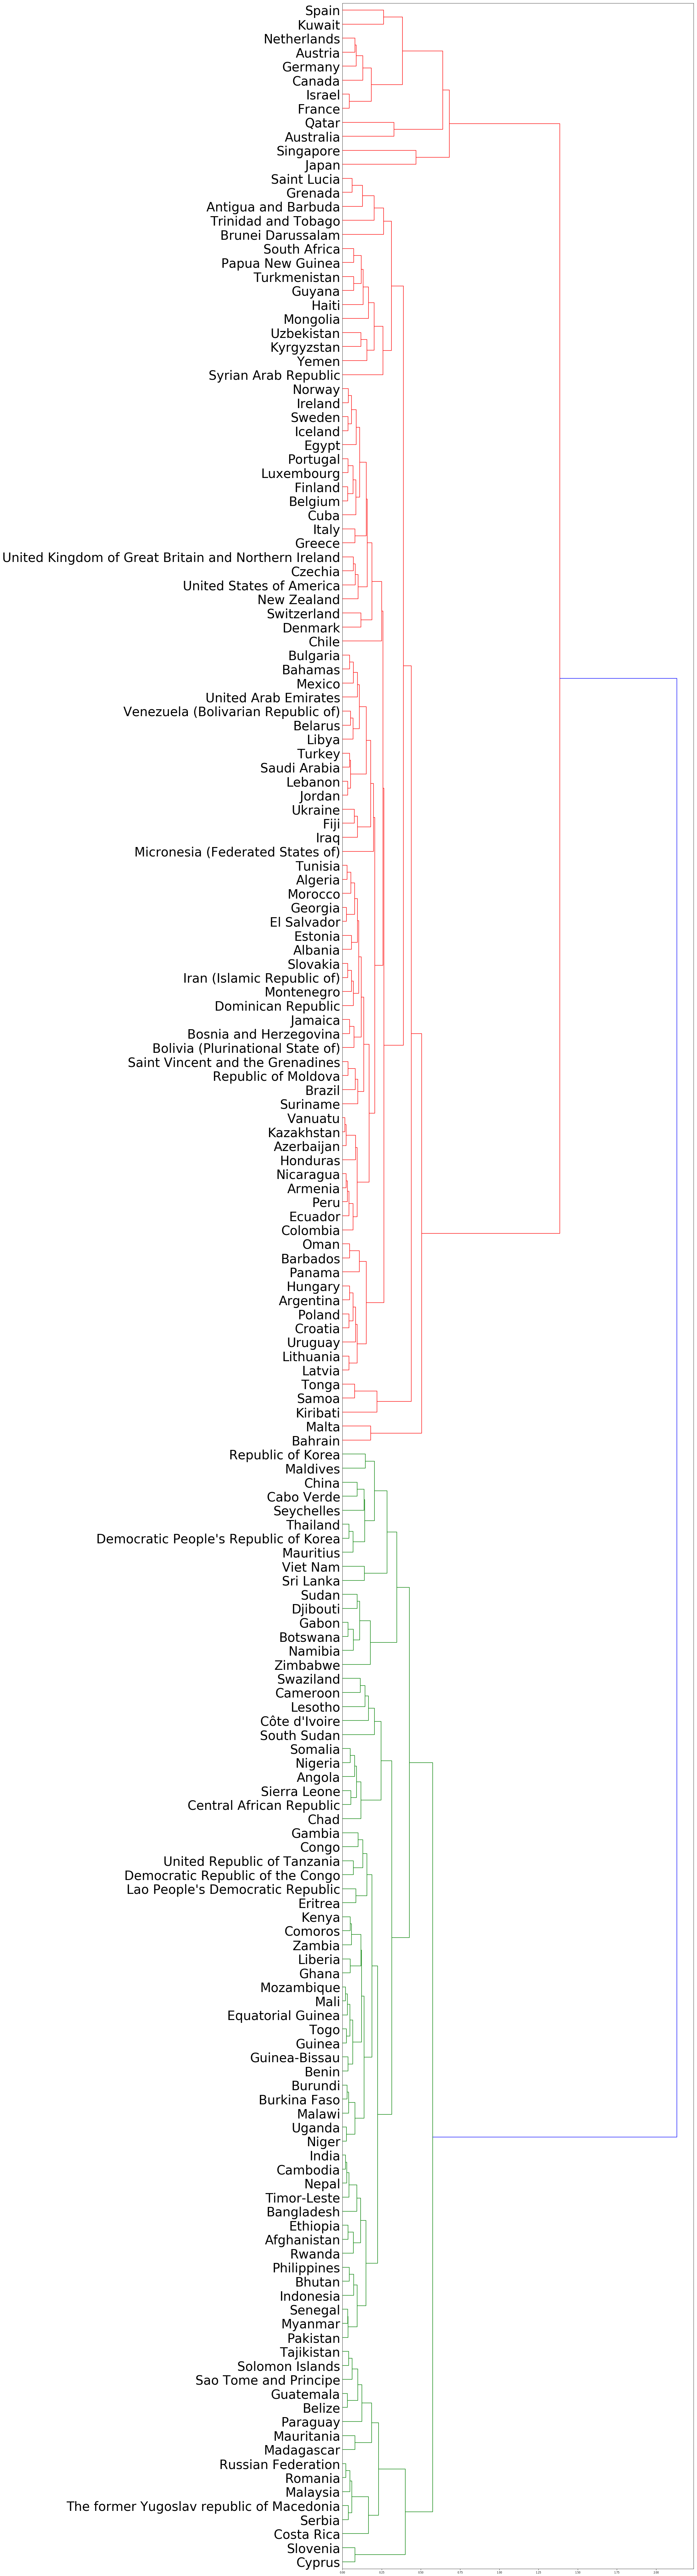

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
Z = linkage(norm_Cluster_dataA, 'average')
plt.figure(figsize=(20, 150))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=40, 
               labels = norm_Cluster_dataA.index)

Next, we did K mean algorithm to do unsupervised learning for prediction. At the first, we set the random points and found the closest points for each color. And, by calculating the distance of each point, we can adapt our group again and again until the central dots doesn’t move anymore. In K mean functions, we can separate our countries into three different groups that helps us to be easier to understand which countries has similar life expectancy. For example, if we get the value of BMI and GDP, we can predict its' life expectancy. 

Text(0, 0.5, 'GDP')

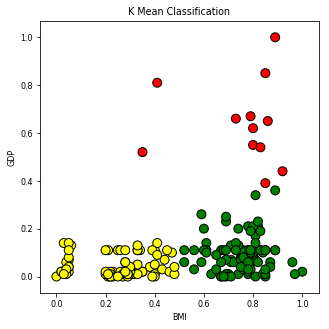

In [86]:
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'green', 'red'])
 
plt.scatter(norm_Cluster_dataA.BMI, norm_Cluster_dataA.GDP, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('BMI')
plt.ylabel('GDP')

For the final prediction, we did supervise prediction to classify our countries into five different group. For this prediction, I used life expectancy columns in each country in 2015 to add a new column called group. We have 5 level of life expectancy 1~5. Level 1 is 50~59 age, level 2 is 60~69, and so on so for. In this prediction, we could classify our countries into five group that helps us to identify what the level of left expectancy in this countries easier. 

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'GDP')

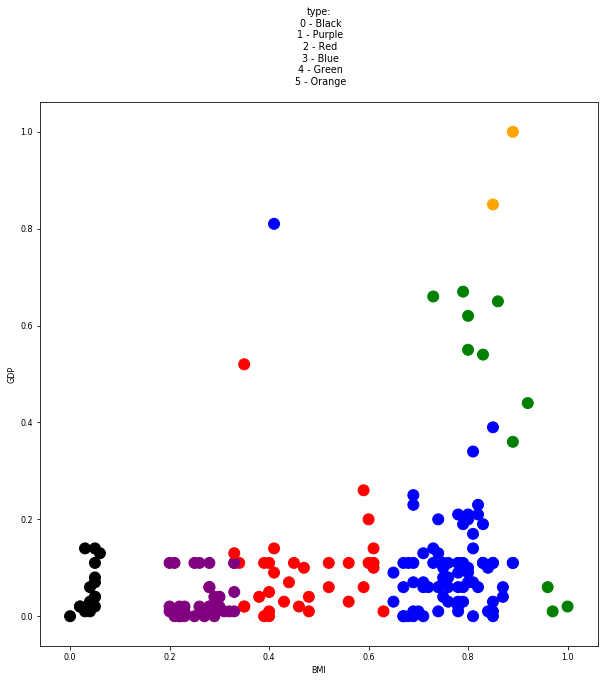

In [87]:
fig = plt.figure(figsize=(10,10))
colormap = np.array(['black', 'purple', 'red', 'blue', 'green','orange'])
 
plt.scatter(KNN_Data_N.BMI, KNN_Data_N.GDP, 
            c = colormap[KNN_Data_N.group], s = 120)
plt.title('type:\n 0 - Black\n 1 - Purple\n 2 - Red\n 3 - Blue\n 4 - Green\n 5 - Orange\n' )
ax = fig.add_subplot(111)
ax.set_xlabel('BMI')
ax.set_ylabel('GDP')

I suggest that using KNN Function is more accurate than K mean function. This is because K mean data will be affected by the data. So, the prediction will not to be specific. 
<br>In general, BMI and GDP affect life expectancy the most. BMI present citizen’s heath, and in higher GDP countries, people has higher life expectancy. If a government want to improve their life expectancy, it may start from how to improve their GDP, and improve its citizen’s health status. On the other hand, this two factors can be the main pointer to classify countries are developing or developed becasue as we can see in exploration, developed and developing countries' life expectancy are in different range of age. So, if we can enhance accuracy in our data. Then, we can use those to predict the life expectanct, and according the range of life expectancy, we can define the country is developed or developing. Thank you.